In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/CDSAML_P13/NY.csv")
df

<ipython-input-3-5a2b5208cdbc>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/CDSAML_P13/NY.csv")


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Private Health Insurance,0,N,Y,43494.00,5588.26
2346927,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,M,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,16662.00,2907.62
2346928,NaN,NaN,NaN,NaN,Redacted for Confidentiality,50 to 69,NaN,M,White,Unknown,...,Minor,Medical,Medicaid,NaN,NaN,0,N,N,7142.00,1692.55
2346929,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Blue Cross/Blue Shield,0,N,Y,13070.00,2447.75


In [4]:
df.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [6]:
df.isna().sum()

Health Service Area                       5464
Hospital County                           5464
Operating Certificate Number              5464
Facility Id                               5464
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      35816
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [7]:
df['Length of Stay'] = df['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])

In [8]:
print("Average length of stay", df["Length of Stay"].mean())

Average length of stay 5.476420908837968


In [9]:
df = df.drop(['Discharge Year'],axis=1)

In [10]:
df['Total Charges']

0           5333.90
1           4865.99
2           5901.54
3           3619.08
4           3185.87
             ...   
2346926    43494.00
2346927    16662.00
2346928     7142.00
2346929    13070.00
2346930    14637.00
Name: Total Charges, Length: 2346931, dtype: float64

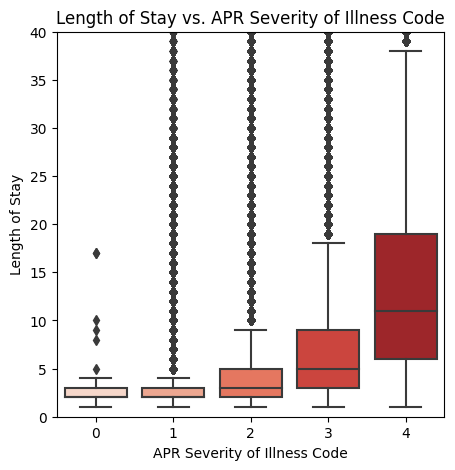

In [11]:
f, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x="APR Severity of Illness Code", y="Length of Stay",
            data=df, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. APR Severity of Illness Code')
plt.show()

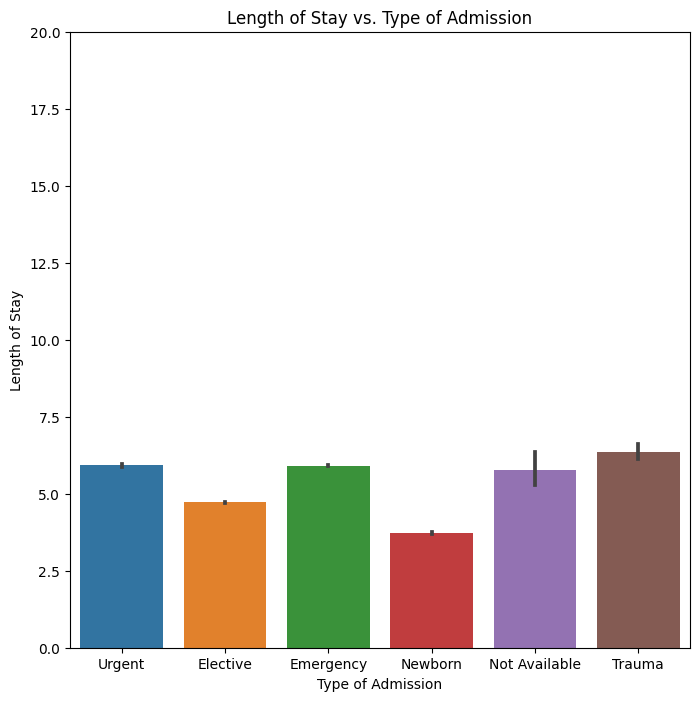

In [12]:
f, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="Type of Admission", y="Length of Stay",data=df)
ax.set(ylim=(0, 20))
plt.title('Length of Stay vs. Type of Admission')
plt.show()

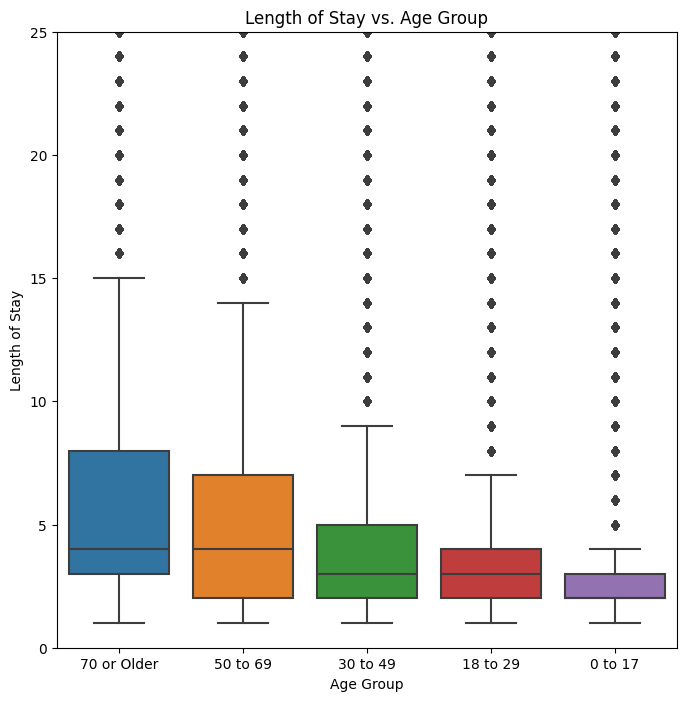

In [13]:
f, ax = plt.subplots(figsize=(8,8))
sns.boxplot(x="Age Group",y="Length of Stay",data=df)
ax.set(ylim=(0,25))
plt.title("Length of Stay vs. Age Group")
plt.show()

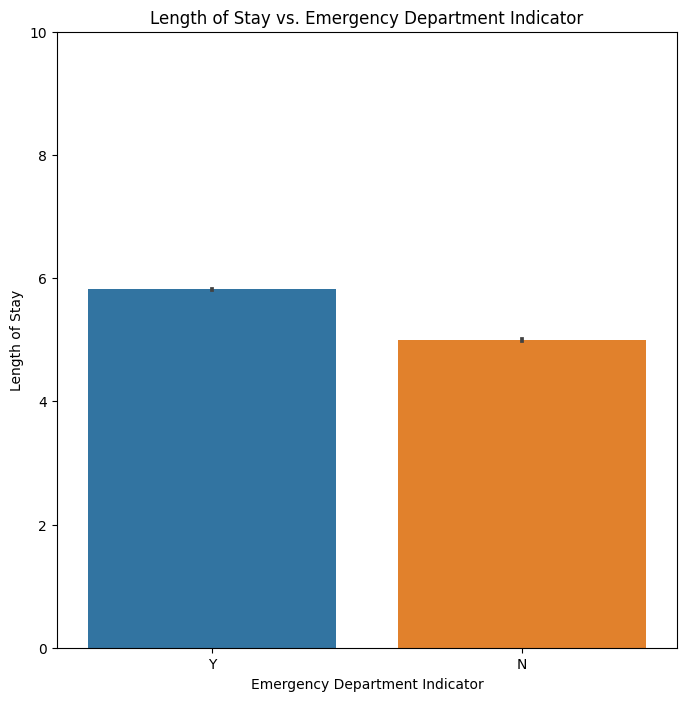

In [14]:
f, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="Emergency Department Indicator",y="Length of Stay",data=df)
ax.set(ylim=(0,10))
plt.title("Length of Stay vs. Emergency Department Indicator")
plt.show()

In [15]:
df = df.drop(["Facility Id", "Total Charges", "Total Costs", "Health Service Area", "Hospital County","Zip Code - 3 digits", "Race", "Ethnicity", "Patient Disposition", "Birth Weight", "Payment Typology 3", "Payment Typology 2", "Operating Certificate Number","Facility Name", "Gender", "CCS Diagnosis Description", "CCS Procedure Description", "APR DRG Description", "APR MDC Description", "APR Severity of Illness Description", "APR Medical Surgical Description", "Abortion Edit Indicator"], axis = 1)

In [16]:
df.dtypes

Age Group                         object
Length of Stay                     int64
Type of Admission                 object
CCS Diagnosis Code                 int64
CCS Procedure Code                 int64
APR DRG Code                       int64
APR MDC Code                       int64
APR Severity of Illness Code       int64
APR Risk of Mortality             object
Payment Typology 1                object
Emergency Department Indicator    object
dtype: object

In [17]:
df = df.dropna(subset=['APR Risk of Mortality'])

In [18]:
mort_string_index = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
age_string_index = {'0 to 17': 1, '18 to 29': 2, '30 to 49': 3, '50 to 69': 4, '70 or Older': 5}

df['Age Group'] = df['Age Group'].apply(lambda x: age_string_index[x])
df['APR Risk of Mortality'] = df['APR Risk of Mortality'].apply(lambda x: mort_string_index[x])
df.head()

,Age Group,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Emergency Department Indicator
0,5,4,Urgent,122,0,139,4,2,1,Medicare,Y
1,5,4,Elective,55,0,422,10,2,2,Medicare,Y
2,5,4,Urgent,122,202,139,4,1,1,Medicare,Y
3,4,2,Elective,55,0,249,6,2,1,Medicare,Y
4,5,2,Elective,122,0,139,4,1,2,Medicare,Y


In [19]:
new_df = df.copy()
new_df.head()

,Age Group,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Emergency Department Indicator
0,5,4,Urgent,122,0,139,4,2,1,Medicare,Y
1,5,4,Elective,55,0,422,10,2,2,Medicare,Y
2,5,4,Urgent,122,202,139,4,1,1,Medicare,Y
3,4,2,Elective,55,0,249,6,2,1,Medicare,Y
4,5,2,Elective,122,0,139,4,1,2,Medicare,Y


In [20]:
new_df.dtypes

Age Group                          int64
Length of Stay                     int64
Type of Admission                 object
CCS Diagnosis Code                 int64
CCS Procedure Code                 int64
APR DRG Code                       int64
APR MDC Code                       int64
APR Severity of Illness Code       int64
APR Risk of Mortality              int64
Payment Typology 1                object
Emergency Department Indicator    object
dtype: object

In [21]:
new_df = pd.get_dummies(df)
new_df

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Federal/State/Local/VA,"Payment Typology 1_Managed Care, Unspecified",Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y
0,5,4,122,0,139,4,2,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5,4,55,0,422,10,2,2,1,0,...,0,0,0,1,0,0,0,0,0,1
2,5,4,122,202,139,4,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,2,55,0,249,6,2,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,5,2,122,0,139,4,1,2,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,0,0,1,0,0,0,0,0,1
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,0,0,1,0,0,0,1
2346928,4,2,657,0,751,19,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2346929,5,1,106,0,201,5,1,2,0,1,...,0,0,0,1,0,0,0,0,0,1


In [22]:
new_df.corr()

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Federal/State/Local/VA,"Payment Typology 1_Managed Care, Unspecified",Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y
Age Group,1.000000,0.111863,-0.205404,-0.149450,-0.339417,-0.318588,0.390520,0.501329,0.023143,0.355715,...,-0.036838,-0.032451,-0.420859,0.665411,0.003394,-0.183685,-0.062747,0.010187,-0.334342,0.334342
Length of Stay,0.111863,1.000000,0.112386,0.042037,0.073522,0.101882,0.346508,0.298888,-0.045297,0.071675,...,-0.010178,-0.013297,-0.018882,0.109136,0.001960,-0.060034,-0.020109,0.001984,-0.050156,0.050156
CCS Diagnosis Code,-0.205404,0.112386,1.000000,0.117454,0.440226,0.460183,-0.192200,-0.286277,-0.016612,-0.042734,...,0.007151,-0.016164,0.190362,-0.176589,0.010627,0.001699,0.034220,0.015000,0.075254,-0.075254
CCS Procedure Code,-0.149450,0.042037,0.117454,1.000000,0.193786,0.190186,-0.016695,-0.044796,0.052024,-0.150512,...,-0.007226,-0.016097,0.102177,-0.104134,-0.001697,0.020412,0.000766,-0.016893,0.140991,-0.140991
APR DRG Code,-0.339417,0.073522,0.440226,0.193786,1.000000,0.968699,-0.107123,-0.161736,0.005267,-0.218914,...,0.013557,0.000132,0.187683,-0.233507,-0.021306,0.050527,0.022450,-0.002296,0.214138,-0.214138
APR MDC Code,-0.318588,0.101882,0.460183,0.190186,0.968699,1.000000,-0.097505,-0.155599,0.031326,-0.218071,...,0.012615,-0.000375,0.186963,-0.230467,-0.017570,0.048716,0.021177,-0.000839,0.215443,-0.215443
APR Severity of Illness Code,0.390520,0.346508,-0.192200,-0.016695,-0.107123,-0.097505,1.000000,0.750619,-0.153386,0.289842,...,-0.019653,-0.019969,-0.158456,0.340365,-0.018159,-0.128638,-0.042226,-0.002372,-0.275685,0.275685
APR Risk of Mortality,0.501329,0.298888,-0.286277,-0.044796,-0.161736,-0.155599,0.750619,1.000000,-0.181936,0.307629,...,-0.019971,-0.023853,-0.249936,0.466331,-0.028513,-0.152892,-0.048382,-0.005209,-0.294219,0.294219
Type of Admission_Elective,0.023143,-0.045297,-0.016612,0.052024,0.005267,0.031326,-0.153386,-0.181936,1.000000,-0.638722,...,0.001735,0.027978,-0.068831,-0.083008,0.061159,0.102304,-0.024282,0.002352,0.553241,-0.553241
Type of Admission_Emergency,0.355715,0.071675,-0.042734,-0.150512,-0.218914,-0.218071,0.289842,0.307629,-0.638722,1.000000,...,-0.025423,-0.040896,-0.043862,0.258712,-0.034850,-0.153929,0.007995,0.008020,-0.827074,0.827074


# 2 bins

In [39]:
bins = [0,6,120]
labels = [6,120]
new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
new_df.head()

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)
print("Train Accuracy:",accuracy_score(y_train, train_predictions))
print("Test Accuracy:",accuracy_score(y_test, test_predictions))

<ipython-input-41-c8e465744f24>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Train Accuracy: 0.8425322046733148
Test Accuracy: 0.8411211767412925


In [42]:
from sklearn.metrics import mean_squared_error
preds = rf.predict(x_test)
rmse = mean_squared_error(y_test, test_predictions, squared=False)
print(f"RMSE of RF model with 2 bins: {rmse:.3f}")

RMSE of the base model: 45.440


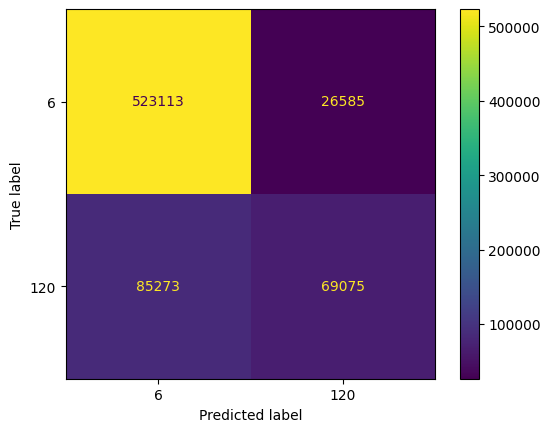

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=test_predictions)

# 3 Bins

In [44]:
bins = [0,6,30,120]
labels = [6,30,120]
new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
new_df.head()

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)
print("Train Accuracy:",accuracy_score(y_train, train_predictions))
print("Test Accuracy:",accuracy_score(y_test, test_predictions))

<ipython-input-46-c8e465744f24>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Train Accuracy: 0.8300922707566591
Test Accuracy: 0.8290282169062817


In [47]:
from sklearn.metrics import mean_squared_error
preds = rf.predict(x_test)
rmse = mean_squared_error(y_test, test_predictions, squared=False)
print(f"RMSE of RF model with 3 bins: {rmse:.3f}")

RMSE of the base model: 14.955


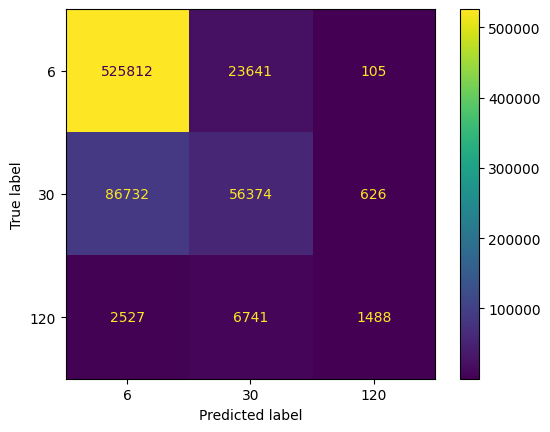

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=test_predictions)

# Many Bins

In [49]:
bins = [0,6,12,30,120]
labels = [6,12,30,120]
new_df['stay_bin']=pd.cut(x = new_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
new_df['stay_label']=pd.cut(x = new_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
new_df['stay_bin'] = new_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
new_df.head()

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
new_X = new_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = new_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)

train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)
print("Train Accuracy:",accuracy_score(y_train, train_predictions))
print("Test Accuracy:",accuracy_score(y_test, test_predictions))

<ipython-input-51-c8e465744f24>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Train Accuracy: 0.798756250098918
Test Accuracy: 0.7962008164239268


In [52]:
from sklearn.metrics import mean_squared_error
preds = rf.predict(x_test)
rmse = mean_squared_error(y_test, test_predictions, squared=False)
print(f"RMSE of RF model with many bins: {rmse:.3f}")

RMSE of the base model: 14.161


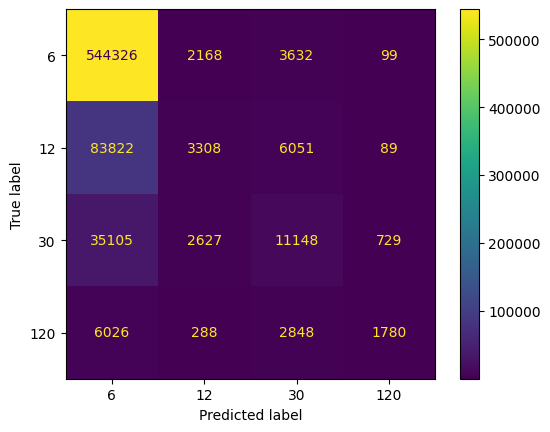

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=test_predictions)